In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')
df = df.drop(columns=['deck', 'embark_town', 'alive', 'who', 'class'])
df.dropna(subset=['age', 'embarked'], inplace=True)

In [3]:
# Encode gender
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Encode embarked
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Family size
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Is alone
df['is_alone'] = (df['family_size'] == 1).astype(int)

# Binned fare
df['fare_bin'] = pd.qcut(df['fare'], 4, labels=False)

# Binned age
df['age_bin'] = pd.cut(df['age'], 5, labels=False)

# Drop columns not needed
df.drop(columns=['adult_male', 'alone'], inplace=True)

# Drop any remaining NA
df.dropna(inplace=True)

In [10]:
# Separate features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Model parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 4,
    'seed': 42
}

# Training
model = xgb.train(params, dtrain, num_boost_round=100, early_stopping_rounds=10, evals=[(dtest, 'test')])

# Predictions
y_pred = model.predict(dtest)

[0]	test-logloss:0.65064
[1]	test-logloss:0.61951
[2]	test-logloss:0.59643
[3]	test-logloss:0.57649
[4]	test-logloss:0.56401
[5]	test-logloss:0.55212
[6]	test-logloss:0.54231
[7]	test-logloss:0.53346
[8]	test-logloss:0.52667
[9]	test-logloss:0.52023
[10]	test-logloss:0.51493
[11]	test-logloss:0.51022
[12]	test-logloss:0.50566
[13]	test-logloss:0.50188
[14]	test-logloss:0.50038
[15]	test-logloss:0.49772
[16]	test-logloss:0.49600
[17]	test-logloss:0.49393
[18]	test-logloss:0.49209
[19]	test-logloss:0.48954
[20]	test-logloss:0.48894
[21]	test-logloss:0.48834
[22]	test-logloss:0.48909
[23]	test-logloss:0.48725
[24]	test-logloss:0.48703
[25]	test-logloss:0.48587
[26]	test-logloss:0.48675
[27]	test-logloss:0.48593
[28]	test-logloss:0.48535
[29]	test-logloss:0.48540
[30]	test-logloss:0.48652
[31]	test-logloss:0.48713
[32]	test-logloss:0.48812
[33]	test-logloss:0.48830
[34]	test-logloss:0.48892
[35]	test-logloss:0.48878
[36]	test-logloss:0.48883
[37]	test-logloss:0.48948
[38]	test-logloss:0.48

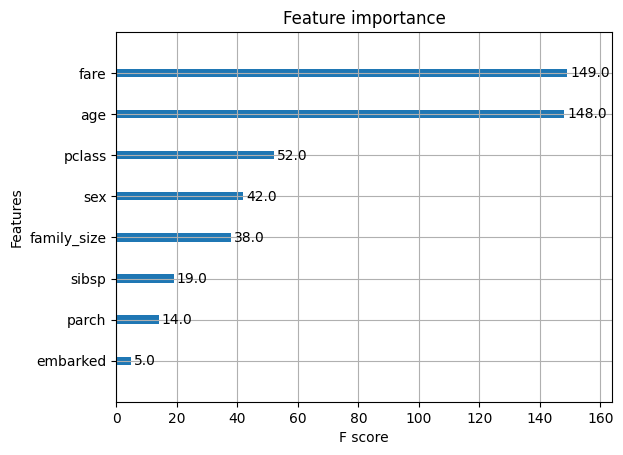

In [11]:
xgb.plot_importance(model)
plt.show()